In [9]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates

# define the dataset location
filename = 'adult-all.csv'
# load the csv file as a data frame
dataframe = pd.read_csv(filename, header=None, na_values='?')
dataframe.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']

dataframe = dataframe.dropna() # drop rows with missing


dataframe['workclass'] = dataframe['workclass'].astype('category').cat.codes
dataframe['education'] = dataframe['education'].astype('category').cat.codes
dataframe['marital-status'] = dataframe['marital-status'].astype('category').cat.codes
dataframe['occupation'] = dataframe['occupation'].astype('category').cat.codes
dataframe['relationship'] = dataframe['relationship'].astype('category').cat.codes
dataframe['race'] = dataframe['race'].astype('category').cat.codes
dataframe['sex'] = dataframe['sex'].astype('category').cat.codes
dataframe['native-country'] = dataframe['native-country'].astype('category').cat.codes
dataframe['label'] = dataframe['label'].astype('category').cat.codes
dataframe['label'] = dataframe['label'].astype('object')

dataframe.drop(columns='education-num') # education and education-num is the same thing

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,5,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,2,245211,9,4,9,3,4,1,0,0,40,38,0
48837,39,2,215419,9,0,9,1,4,0,0,0,36,38,0
48839,38,2,374983,9,2,9,0,4,1,0,0,50,38,0
48840,44,2,83891,9,0,0,3,1,1,5455,0,40,38,0


In [2]:
dataframe.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
age,1.000000,0.085892,-0.075792,-0.003511,0.037623,-0.271623,-0.004474,-0.247564,0.023776,0.082053,0.079683,0.059351,0.101992,-0.003180
workclass,0.085892,1.000000,-0.034970,0.017846,0.040779,-0.033221,0.017508,-0.065049,0.049765,0.069638,0.034543,0.008233,0.051366,0.003889
fnlwgt,-0.075792,-0.034970,1.000000,-0.025318,-0.041993,0.033096,-0.002036,0.009909,-0.029188,0.027240,-0.004110,-0.004349,-0.018679,-0.061098
education,-0.003511,0.017846,-0.025318,1.000000,0.347444,-0.041520,-0.033499,-0.013179,0.011457,-0.027569,0.029889,0.016877,0.060887,0.077893
education-num,0.037623,0.040779,-0.041993,0.347444,1.000000,-0.064986,0.089686,-0.088431,0.031655,0.003417,0.126907,0.081711,0.146206,0.092994
marital-status,-0.271623,-0.033221,0.033096,-0.041520,-0.064986,1.000000,0.016399,0.180436,-0.070302,-0.120008,-0.042399,-0.034820,-0.183178,-0.022721
occupation,-0.004474,0.017508,-0.002036,-0.033499,0.089686,0.016399,1.000000,-0.051644,-0.000026,0.056625,0.019435,0.015267,0.016160,-0.002848
relationship,-0.247564,-0.065049,0.009909,-0.013179,-0.088431,0.180436,-0.051644,1.000000,-0.118584,-0.582974,-0.056818,-0.058425,-0.259194,-0.007144
race,0.023776,0.049765,-0.029188,0.011457,0.031655,-0.070302,-0.000026,-0.118584,1.000000,0.088935,0.014078,0.020955,0.044738,0.124342
sex,0.082053,0.069638,0.027240,-0.027569,0.003417,-0.120008,0.056625,-0.582974,0.088935,1.000000,0.047444,0.046457,0.231425,-0.004170


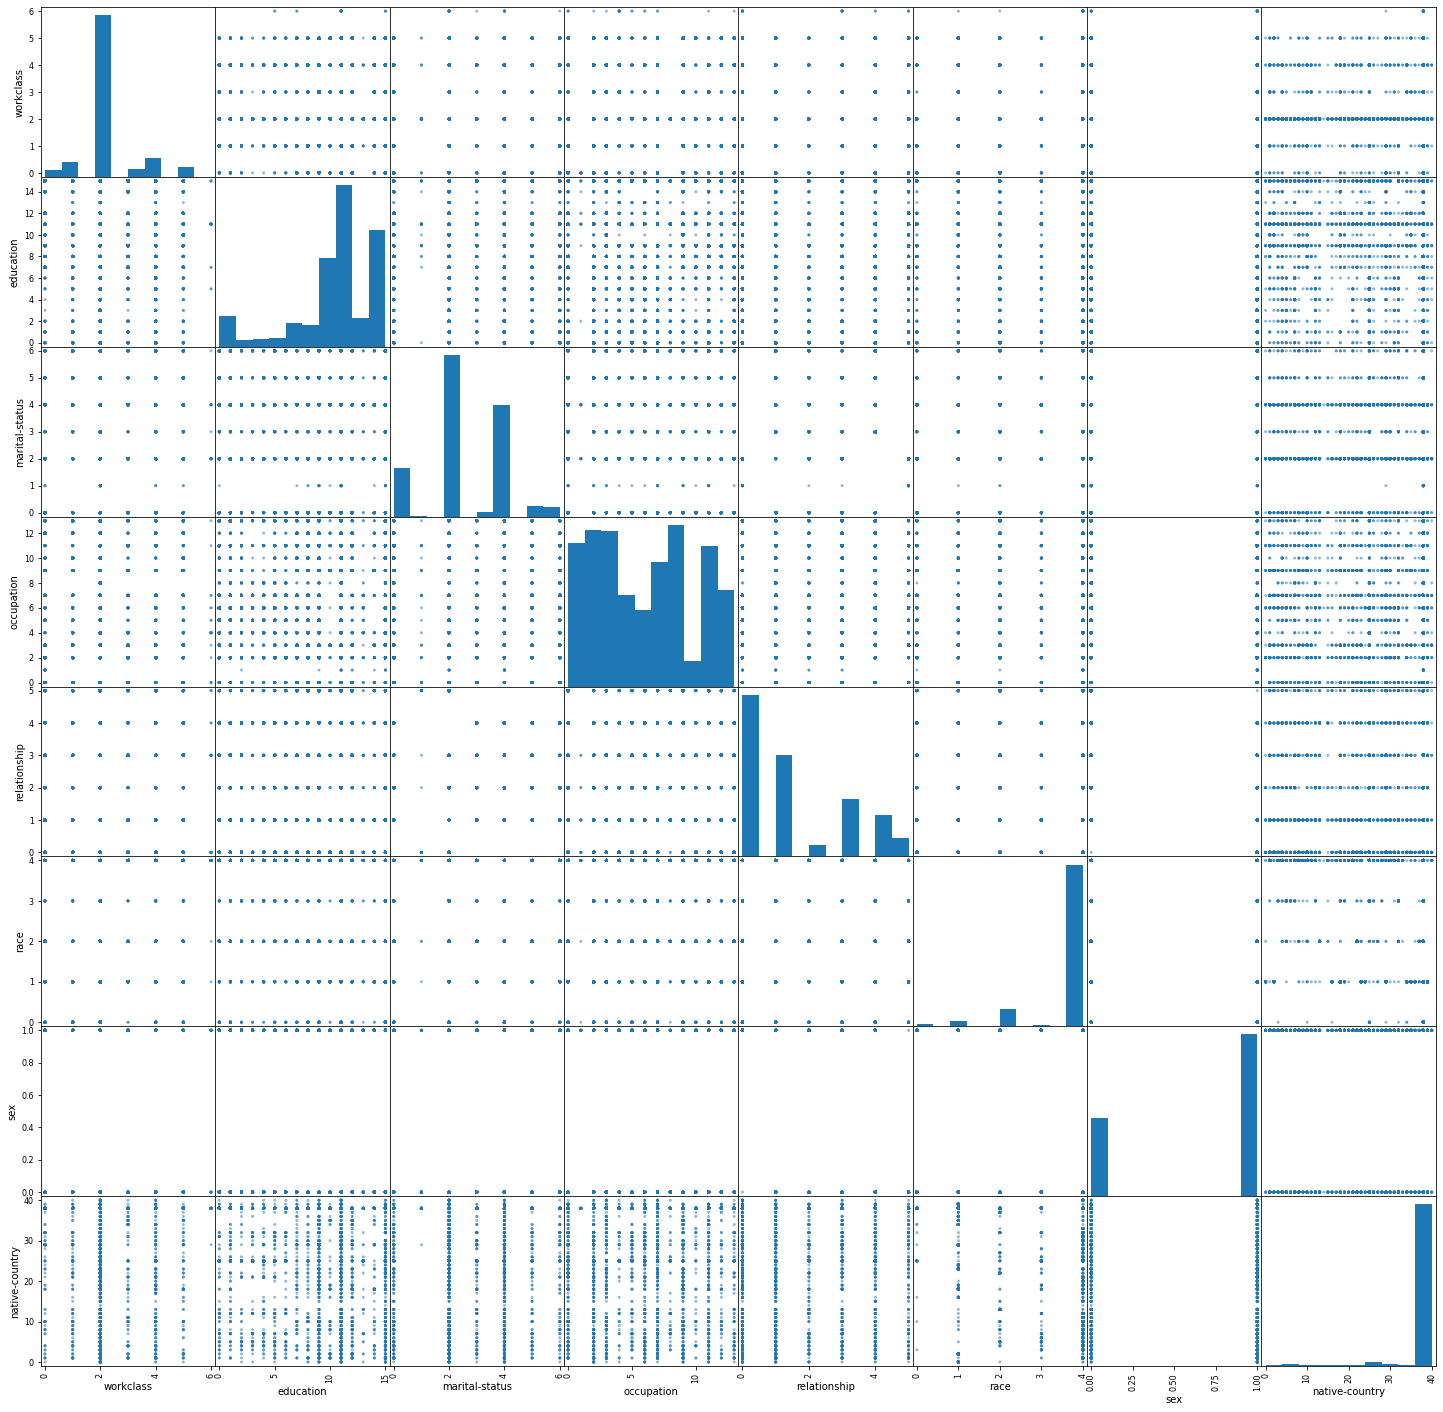

In [3]:
catcols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
intcols = ['age','fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week']

plot = pd.plotting.scatter_matrix(dataframe[catcols], figsize=[25,25])

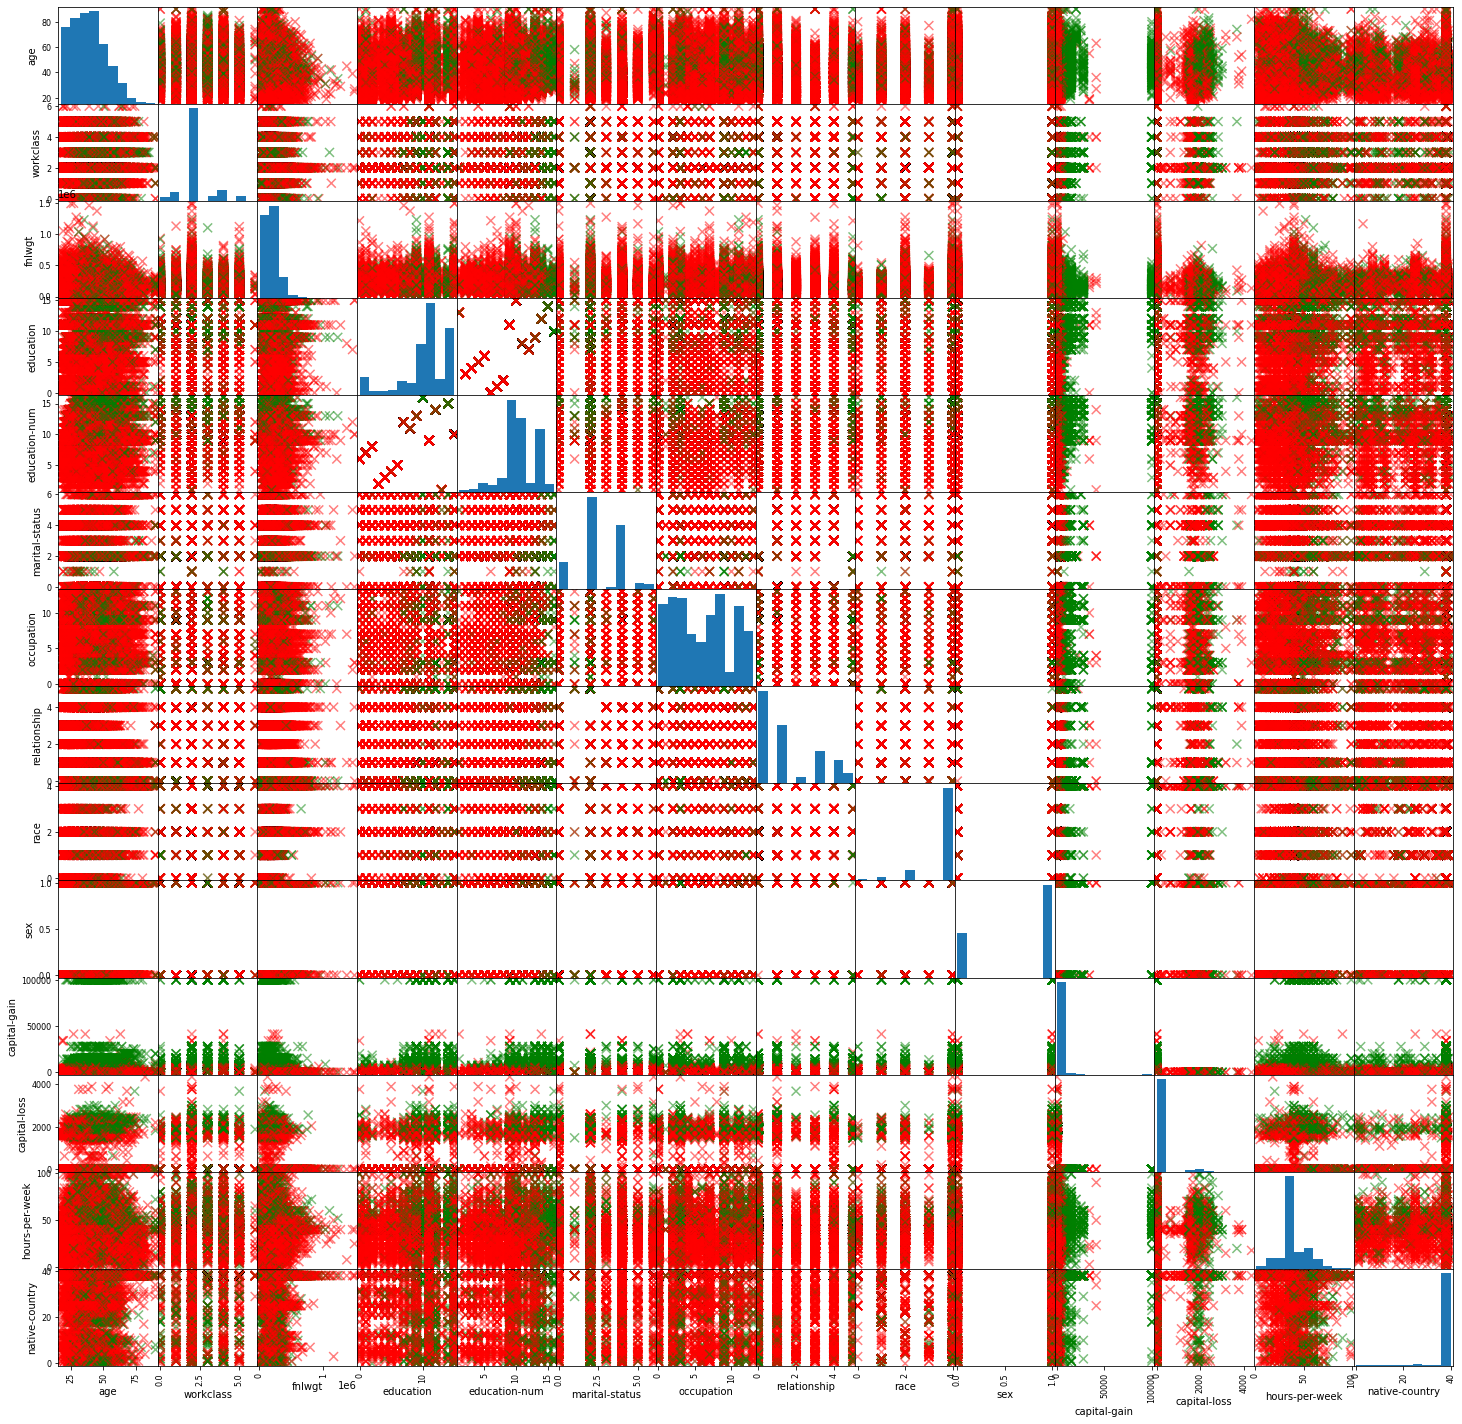

In [4]:
colors = ['red', 'green']
plot = pd.plotting.scatter_matrix(dataframe, figsize=[25, 25], marker='x', c=dataframe.label.apply(lambda x:colors[int(x)]), s=80)

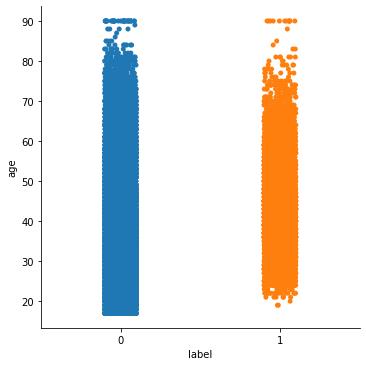

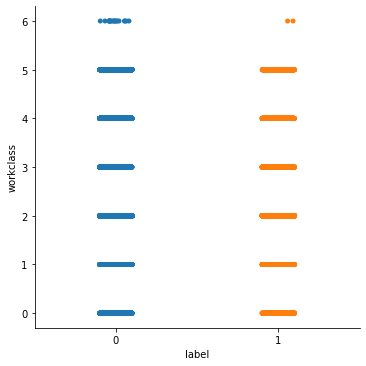

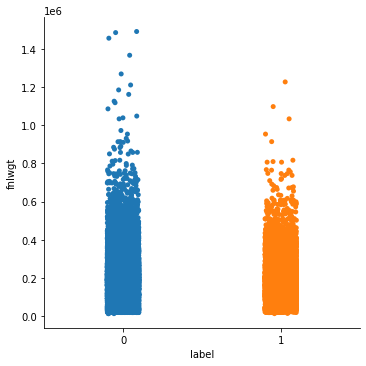

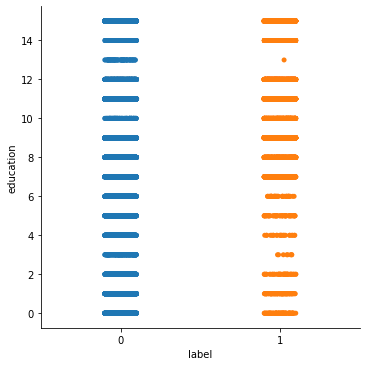

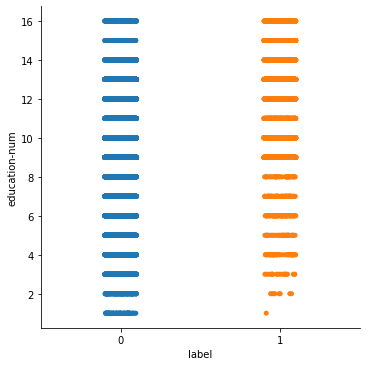

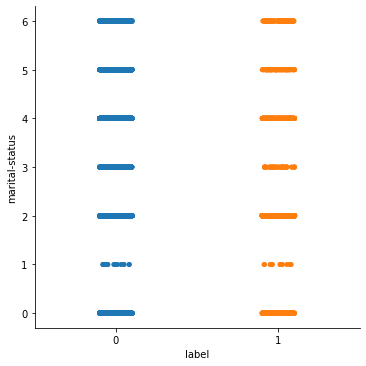

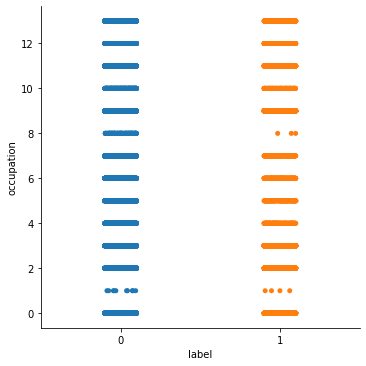

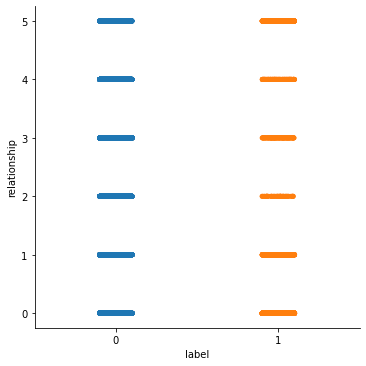

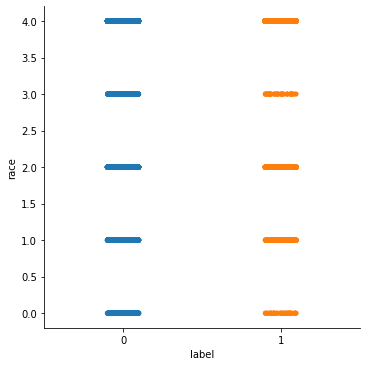

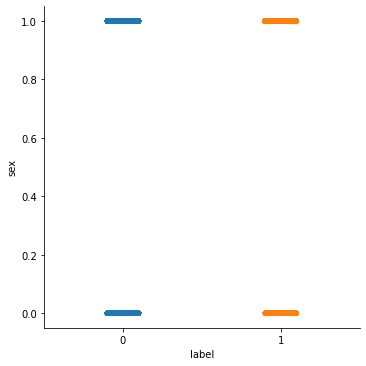

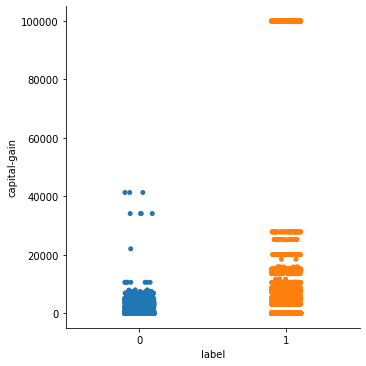

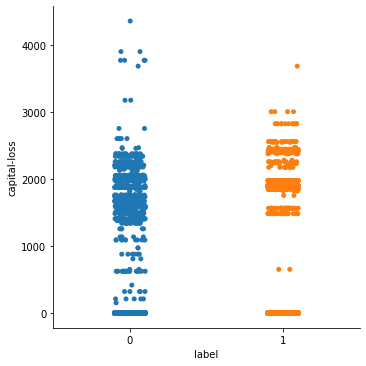

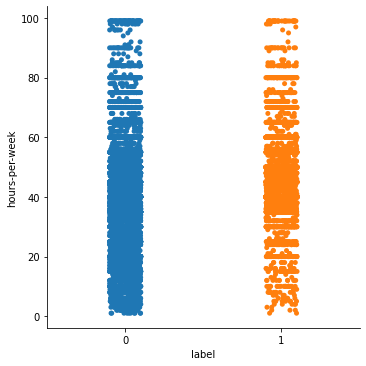

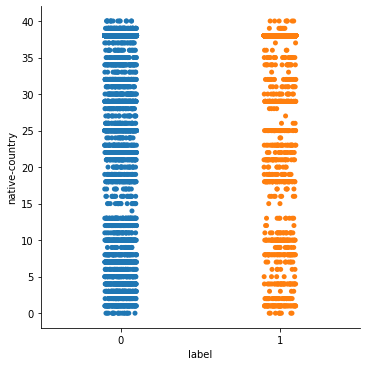

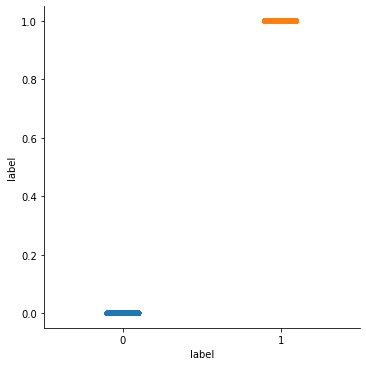

In [3]:
for col in dataframe.columns : 
  sns.catplot(x='label', y = col, data=dataframe)

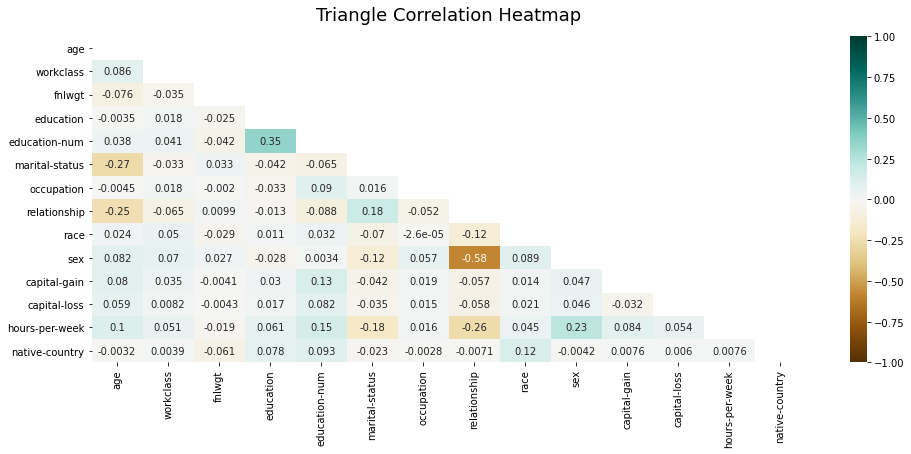

In [4]:
import numpy as np

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
#dataframe.corr()
# plt.figure(figsize=(10,10))

# sns.heatmap(dataframe.corr(),annot=True,cmap='Blues')

Integer Type Columns: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
Object Type Columns: []


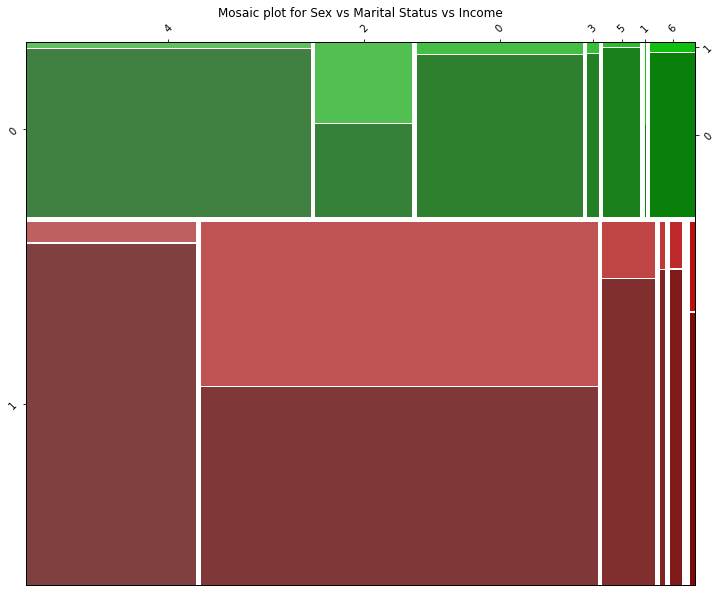

In [5]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']


temp = list(dataframe.dtypes)
intCols, objCols = [], []
for i in range(len(temp)):
    if(temp[i] == 'O'):
        objCols.append(columns[i])
    else:
        intCols.append(columns[i])
objCols = objCols[:-1]
print("Integer Type Columns:", intCols)
print("Object Type Columns:", objCols)


def emptyLabel(m):
    return ''

def createmulitvariatemosaicplots(col1, col2, col3,title):
    plt.rcParams["figure.figsize"]=(12, 10)
    mosaic(dataframe, [col1,col2,col3],
           gap=0.01, 
           label_rotation=45.0, 
           horizontal=False,
           title=title,
           labelizer=emptyLabel
          )
    plt.show()
    
createmulitvariatemosaicplots('sex','marital-status','label', 'Mosaic plot for Sex vs Marital Status vs Income')

In [6]:
dataframe['class_label'] = dataframe['label'] == "<=50K"

def label(row):
    if(row['class_label']):
        return "Red"
    else:
        return "Blue"

dataframe['class_label'] = dataframe.apply(lambda row : label(row), axis = 1)
dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label,class_label
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0,Blue
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0,Blue
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0,Blue
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0,Blue
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,2,245211,9,13,4,9,3,4,1,0,0,40,38,0,Blue
48837,39,2,215419,9,13,0,9,1,4,0,0,0,36,38,0,Blue
48839,38,2,374983,9,13,2,9,0,4,1,0,0,50,38,0,Blue
48840,44,2,83891,9,13,0,0,3,1,1,5455,0,40,38,0,Blue


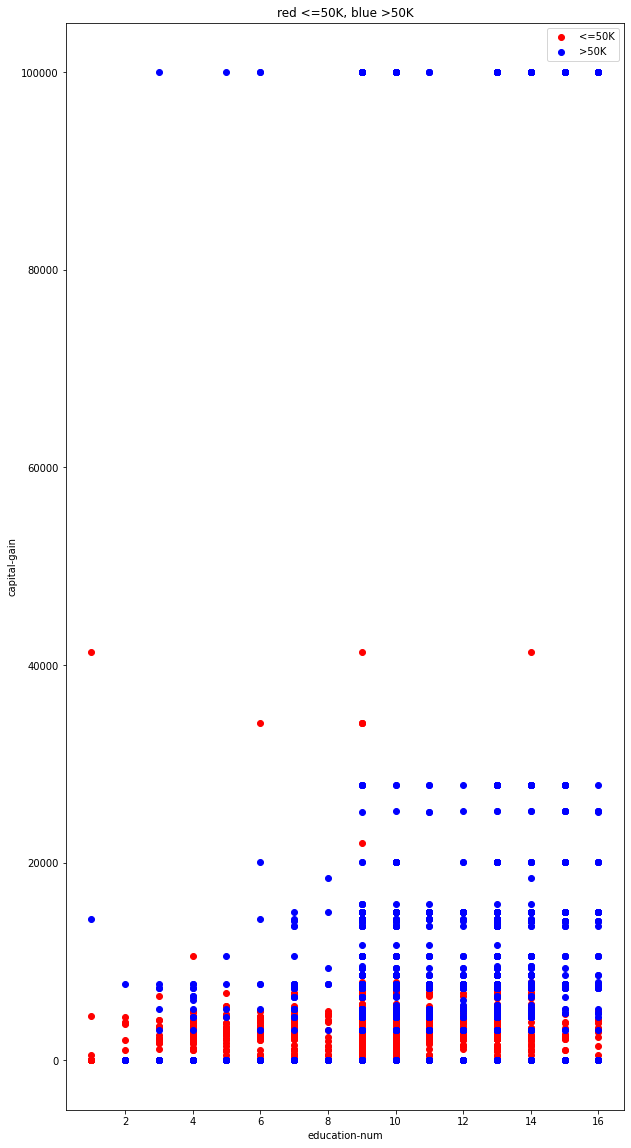

In [7]:
def plot_scatter(col1, col2,df,title):
    fig, axes = plt.subplots(1, 1, figsize = (10, 20))
    fig.subplots_adjust(hspace = 0.6, wspace = 0.4)
    
    colors = df['class_label']
    below50k = df[df['label'] == 0]#'<=50K']
    above50k = df[df['label'] == 1]#'>50K']
    
    c1 = below50k[col1]
    c2 = below50k[col2]
    
    axes.scatter(c1, c2, c = 'r', label = '<=50K')
    
    
    c1 = above50k[col1]
    c2 = above50k[col2]
    
    axes.scatter(c1, c2, c = 'b', label = '>50K')
    
    axes.legend()
    
    axes.set_title("red <=50K, blue >50K")
    axes.set_xlabel(col1)
    axes.set_ylabel(col2)
    
#         plt.rcParams["figure.figsize"]=(12, 10)
#         plt.title("Scatter plot for " + col1 + " vs " + col2)
#         plt.xlabel(col1)
#         plt.ylabel(col2)
#         plt.xticks(rotation=45)
#         plt.legend(['<=50K','>50K'])
#         plt.scatter(dataframe[col1], dataframe[col2],c=dataframe['label'].map({'<=50K': 'green', '>50K': 'red'}),
#                                alpha=0.5)
#         plt.show()

plot_scatter('education-num','capital-gain',dataframe,'Scatter plot')

In [ ]:
sns.pairplot(dataframe, hue='label')  
plt.show()

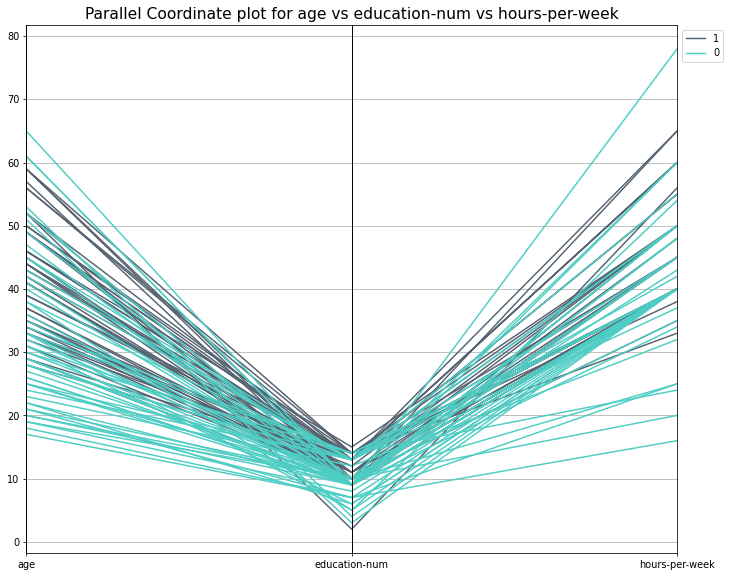

In [10]:
def craeteparallelcoordinateplot_3c(dataframe,col1, col2, col3):
    plt.rcParams['figure.dpi'] = 70
    color_val = ['#556270', '#4ECDC4']
    df_copy = dataframe[[col1, col2, col3]].copy()
    #norm_df = pd.DataFrame(MinMaxScaler().fit_transform(df_copy), columns = [col1, col2, col3])
    norm_df=df_copy
    norm_df['label'] = dataframe['label']
    df_below50k = norm_df[norm_df['label'] == 0].sample(n = 50) #"<=50K"
    df_above50k = norm_df[norm_df['label'] == 1].sample(n = 50) # ">50K"
    norm_df_sampled = pd.concat([df_above50k, df_below50k])
    parallel_coordinates(norm_df_sampled, class_column='label', cols=[col1, col2, col3],color = color_val)

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=1)
    plt.title('Parallel Coordinate plot for '+col1 +' vs '+col2+' vs ' +col3,fontsize=16)
    plt.show()
    

craeteparallelcoordinateplot_3c(dataframe,'age','education-num','hours-per-week')

0
9
3
2

1
11
0
4


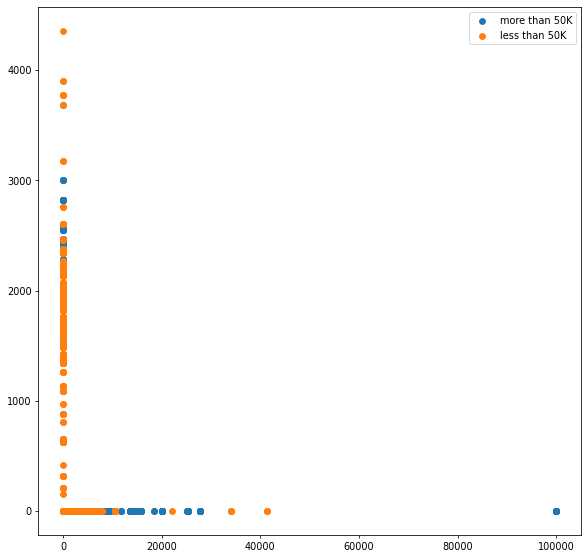

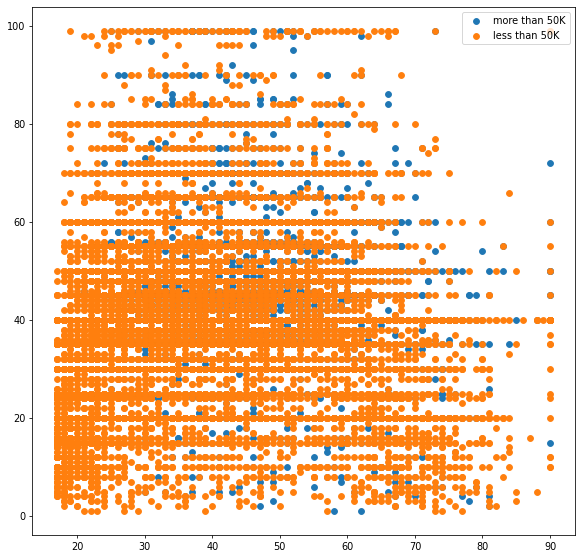

In [11]:
##########################Clustering on the top 8-9 features#####################

# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

cluster_cols = ['capital-gain','relationship','age','education','capital-loss','hours-per-week','occupation','marital-status','fnlwgt']

more_than = dataframe[dataframe['label']==1]
less_than = dataframe[dataframe['label']==0]



###################################################CATEGORICAL VARIBALES COMMON VALUES FOR EACH CLASS###########################
print(more_than['relationship'].value_counts().idxmax()) # corresponds to wife
print(more_than['education'].value_counts().idxmax()) # corresponds to 9th
print(more_than['occupation'].value_counts().idxmax()) # corresponds to sales
print(more_than['marital-status'].value_counts().idxmax()) # corresponds to never-married
print()
print(less_than['relationship'].value_counts().idxmax()) # corresponds to own-child
print(less_than['education'].value_counts().idxmax()) # corresponds to 11th
print(less_than['occupation'].value_counts().idxmax()) # corresponds to tech-support
print(less_than['marital-status'].value_counts().idxmax()) # corresponds to widowed
################################################################################################################################




# Cluster plots for the two classes with variables capital gain and capital loss
capitals_more = more_than[['capital-gain','capital-loss']]
capitals_less = less_than[['capital-gain','capital-loss']]

#print(len(capitals_more['capital-gain'].values),len(capitals_more['capital-loss'].values))
#print(len(capitals_less['capital-gain'].values),len(capitals_less['capital-loss'].values))
#print(capitals_more['capital-gain'].values)
plt.figure(figsize=(10,10))
plt.scatter(capitals_more['capital-gain'].values,capitals_more['capital-loss'].values,label='more than 50K')
plt.scatter(capitals_less['capital-gain'],capitals_less['capital-loss'],label='less than 50K')
plt.legend()
plt.show()



# Cluster plots for the two classes with variables age and number of hours per week
capitals_more = more_than[['age','hours-per-week']]
capitals_less = less_than[['age','hours-per-week']]

plt.figure(figsize=(10,10))
plt.scatter(capitals_more['age'].values,capitals_more['hours-per-week'].values,label='more than 50K')
plt.scatter(capitals_less['age'],capitals_less['hours-per-week'],label='less than 50K')
#plt.axis([20,90,20,70])
plt.legend()
plt.show()



In [12]:
#from sklearn.cluster import Kmeans

age_more = more_than['age']
age_less = less_than['age']

print("Mean Age for salary>50K",age_more.mean())
print("Std Dev Age for salary>50K",age_more.std())
print("Mean Age for salary<=50K",age_less.mean())
print("Std Dev Age for salary<=50K",age_less.std())

print()

hours_more = more_than['hours-per-week']
hours_less = less_than['hours-per-week']

print("Mean hours per week for salary>50K",hours_more.mean())
print("Std Dev hours per week for salary>50K",hours_more.std())
print("Mean hours per week for salary<=50K",hours_less.mean())
print("Mean hours per week for salary<=50K",hours_less.std())

print()

final_more = more_than['fnlwgt']
final_less = less_than['fnlwgt']

print("Mean fnlwgt for salary>50K",final_more.mean())
print("Std Dev fnlwgt for salary>50K",final_more.std())
print("Mean fnlwgt for salary<=50K",final_less.mean())
print("Mean fnlwgt for salary<=50K",final_less.std())

print()

capitals_more = more_than[['capital-gain','capital-loss']]
capitals_less = less_than[['capital-gain','capital-loss']]
print("Mean fnlwgt for salary>50K\n",capitals_more.mean())
print("Std Dev fnlwgt for salary>50K\n",capitals_more.std())
print("Mean fnlwgt for salary<=50K\n",capitals_less.mean())
print("Std Dev fnlwgt for salary<=50K\n",capitals_less.std())

Mean Age for salary>50K 44.00606709493219
Std Dev Age for salary>50K 10.340502481127174
Mean Age for salary<=50K 36.749426706650205
Std Dev Age for salary<=50K 13.564683118580811

Mean hours per week for salary>50K 45.69048893647395
Std Dev hours per week for salary>50K 10.797764170614204
Mean hours per week for salary<=50K 39.3720232845299
Mean hours per week for salary<=50K 11.974127109285616

Mean fnlwgt for salary>50K 188397.96734475374
Std Dev fnlwgt for salary>50K 102492.12488352026
Mean fnlwgt for salary<=50K 190175.21423531487
Mean fnlwgt for salary<=50K 106653.65959041905

Mean fnlwgt for salary>50K
 capital-gain    3991.791667
capital-loss     193.487063
dtype: float64
Std Dev fnlwgt for salary>50K
 capital-gain    14616.543746
capital-loss      592.642319
dtype: float64
Mean fnlwgt for salary<=50K
 capital-gain    149.023402
capital-loss     54.032428
dtype: float64
Std Dev fnlwgt for salary<=50K
 capital-gain    927.447387
capital-loss    312.220461
dtype: float64


In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

income_raw = dataframe['label']
feature_raw = dataframe.drop('label', axis=1)

num_col = dataframe.dtypes[dataframe.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)


skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data=feature_raw)
features_log_transformed[skewed] = feature_raw[skewed].apply(lambda x: np.log(x + 1))


features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[num_col] = scaler.fit_transform(features_log_transformed[num_col])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head())



# One-hot encode the 'features_log_minmax_transform' data using sklearn.OneHotEncoder

# Categorical columns' names
cat_feats = features_log_minmax_transform.dtypes[features_log_minmax_transform.dtypes=='object'].index.tolist()
cat_idx = [features_log_minmax_transform.columns.get_loc(col) for col in cat_feats]

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Fit and transform the encoder on categorical features
encoded_cat_feats = encoder.fit_transform(features_log_minmax_transform.loc[:,cat_feats])

# Extract one-hot-encoder's feature names
cat_col_name = features_log_minmax_transform.columns.values[cat_idx].tolist()
encoded_cat_feats_name = encoder.get_feature_names(cat_col_name)

# Generate OHE dataframe and concatenate it with the numerical dataframe later
encoded_cat_feats_df = pd.DataFrame(encoded_cat_feats, columns=encoded_cat_feats_name)
#encoded_cat_feats_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,0.833333,0.043350,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.667492,0.0,0.397959,0.95
1,0.452055,0.666667,0.047274,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.95
2,0.287671,0.333333,0.136877,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.95
3,0.493151,0.333333,0.149792,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.95
4,0.150685,0.333333,0.219998,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.10


In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


feature_all = dataframe.drop('label', axis=1)
features_log_transformed_all = pd.DataFrame(data=feature_all)

features_log_transformed_all[skewed] = feature_all[skewed].apply(lambda x: np.log(x + 1))


scaler = MinMaxScaler()
features_log_minmax_transform_all = pd.DataFrame(data = features_log_transformed_all)
features_log_minmax_transform_all[num_col] = scaler.fit_transform(features_log_transformed_all[num_col])


cat_feats = features_log_minmax_transform.dtypes[features_log_minmax_transform.dtypes=='object'].index.tolist()
# Extract one-hot-encoder's feature names
cat_col_name = features_log_minmax_transform.columns.values[cat_idx].tolist()
encoded_cat_feats_name = encoder.get_feature_names(cat_col_name)



# Apply OHE above to transform the test dataset
encoded_cat_feats_all = encoder.fit_transform(features_log_minmax_transform_all.loc[:,cat_feats])

# Generate OHE dataframe and concatenate it with the numerical dataframe later
encoded_cat_feats_df_all = pd.DataFrame(encoded_cat_feats_all, columns=encoded_cat_feats_name)



# Extract the dataframe with only numerical features
num_feats_df_all = features_log_minmax_transform_all[num_col].reset_index()

# Concatenate numerical and encoded categorical features together
adult_data_processed = pd.merge(num_feats_df_all, encoded_cat_feats_df_all, left_index=True, right_index=True).drop('index', axis=1)



#print("{} total features after one-hot encoding.".format(len(X_all.columns)))

scaler2 = StandardScaler()
adult_data_processed[feature_raw.columns] = scaler2.fit_transform(adult_data_processed[feature_raw.columns].values)
adult_data_processed.head()

# Apply PCA to the data
pca = PCA()
model = pca.fit_transform(adult_data_processed)


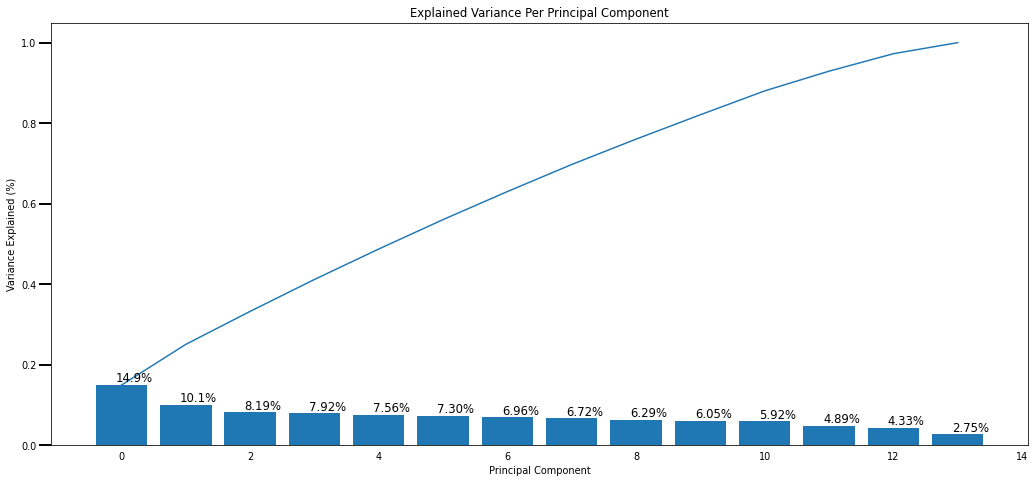

In [15]:
# Investigate the variance accounted for by each principal component.

def plot_pc(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT: None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 8))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
    
plot_pc(pca)

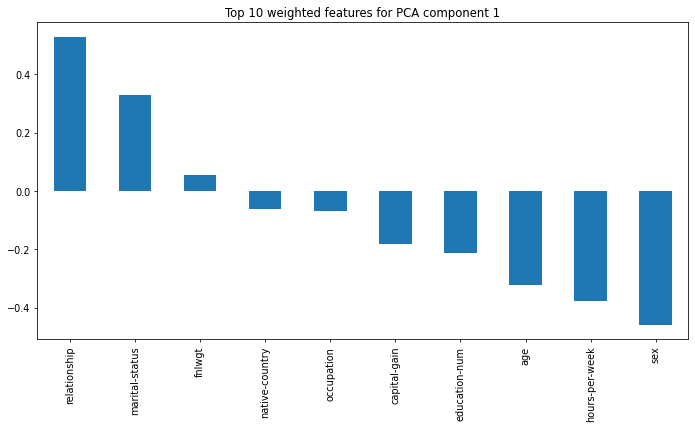

relationship      0.5285
marital-status    0.3278
fnlwgt            0.0566
native-country   -0.0608
occupation       -0.0680
capital-gain     -0.1829
education-num    -0.2112
age              -0.3210
hours-per-week   -0.3764
sex              -0.4591
Name: 0, dtype: float64

In [16]:
# Define a function to show the weight of each features by dimension
def show_weight(full_dataset, pca, comp_n, feat_n):
    '''
    Display the weight of each feature in dimension i
    INPUT: 
        full_dataset: dataset
        pca: PCA model fitted with data
        comp_n: index of component
        feat_n: feature number
    OUTPUT: weight of each feature 
    '''
    components = pd.DataFrame(np.round(pca.components_, 4), columns=full_dataset.keys()).iloc[comp_n - 1]
    components.sort_values(ascending=False, inplace=True)
    top2n_components = pd.concat([components.head(feat_n), components.tail(feat_n)])

    # Plot the result
    top2n_components.plot(kind='bar', 
                          title='Top {} weighted features for PCA component {}'.format(feat_n*2, comp_n),
                          figsize=(12, 6))
    plt.show()
#     top_components = pd.concat([components.iloc[:5,:],components.iloc[-5:]]).reset_index()
    return top2n_components


components1 = show_weight(adult_data_processed, pca, 1, 5)
components1

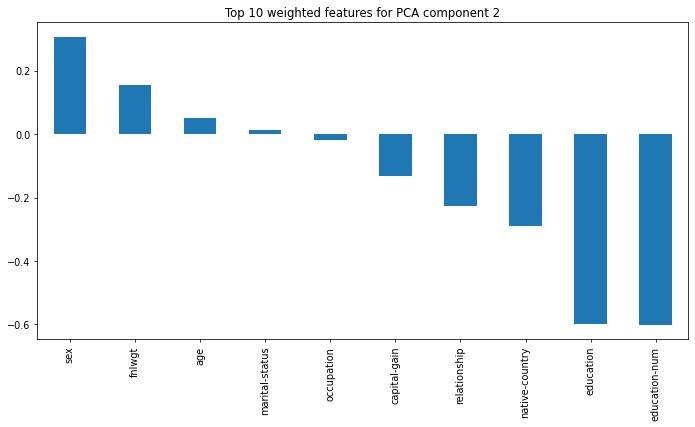

sex               0.3077
fnlwgt            0.1558
age               0.0502
marital-status    0.0114
occupation       -0.0195
capital-gain     -0.1310
relationship     -0.2259
native-country   -0.2885
education        -0.5979
education-num    -0.6012
Name: 1, dtype: float64


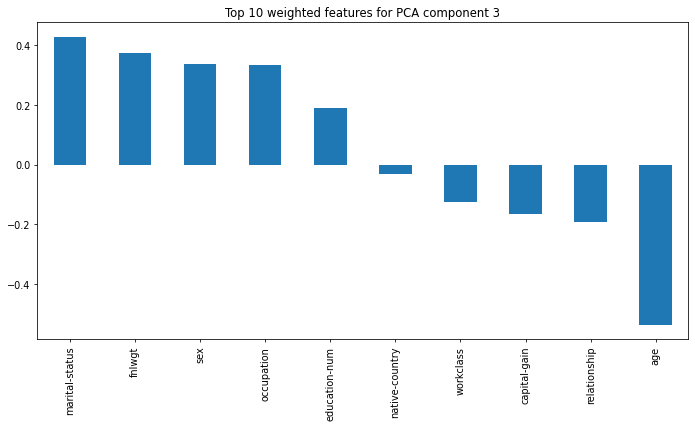

marital-status    0.4296
fnlwgt            0.3759
sex               0.3390
occupation        0.3324
education-num     0.1905
native-country   -0.0312
workclass        -0.1266
capital-gain     -0.1642
relationship     -0.1930
age              -0.5370
Name: 2, dtype: float64


In [17]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

components2 = show_weight(adult_data_processed, pca, 2, 5)
print(components2)


# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

components3 = show_weight(adult_data_processed, pca, 3, 5)
print(components3)


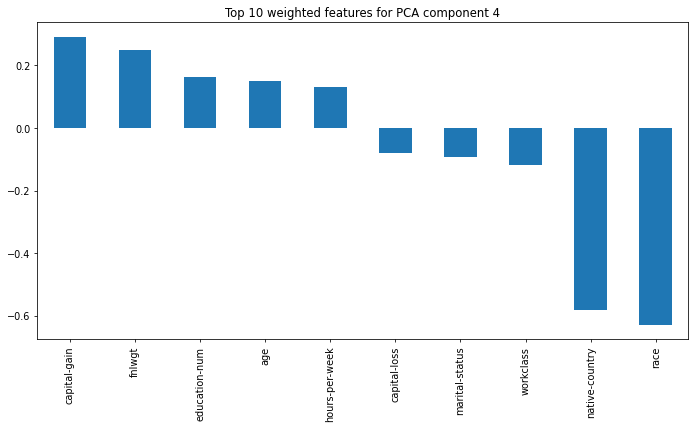

capital-gain      0.2915
fnlwgt            0.2486
education-num     0.1628
age               0.1515
hours-per-week    0.1325
capital-loss     -0.0781
marital-status   -0.0910
workclass        -0.1176
native-country   -0.5803
race             -0.6288
Name: 3, dtype: float64


In [18]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

components4 = show_weight(adult_data_processed, pca, 4, 5)
print(components4)

In [19]:
from sklearn.cluster import KMeans
from time import time

pca = PCA(n_components=14)
pca_14 = pca.fit_transform(adult_data_processed)

# Investigate the change in within-cluster distance across number of clusters.
def get_kmeans_score(data, center):
    '''
    return the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    # instantiate kmeans
    kmeans = KMeans(n_clusters=center)
    
    # Then fit the model to you data using the fit mothod
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score



scores = []
centers = list(range(1, 12))

start = time()

for center in centers:
    print('Fitting k = {} '.format(center))
    scores.append(get_kmeans_score(pca_14, center))
end = time()

print("--- Run time: %s mins ---" % np.round(((end - start)/60),2))



Fitting k = 1 
Fitting k = 2 
Fitting k = 3 
Fitting k = 4 
Fitting k = 5 
Fitting k = 6 
Fitting k = 7 
Fitting k = 8 
Fitting k = 9 
Fitting k = 10 
Fitting k = 11 
--- Run time: 0.25 mins ---


Text(0.5, 1.0, 'SSE vs. K')

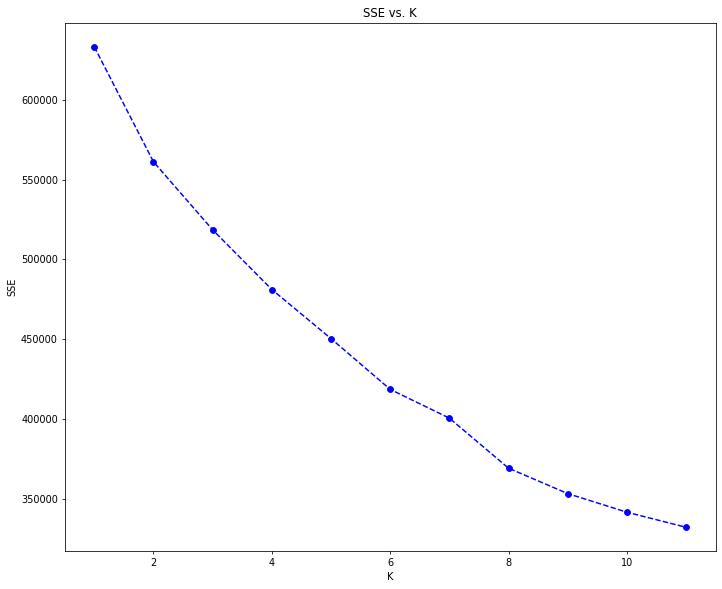

In [20]:
# Plot the SSE value to decide the K value
plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE vs. K')

0    18928
1    26294
Name: Prediction, dtype: int64

,Prediction
index,
0,0.418557
1,0.581443


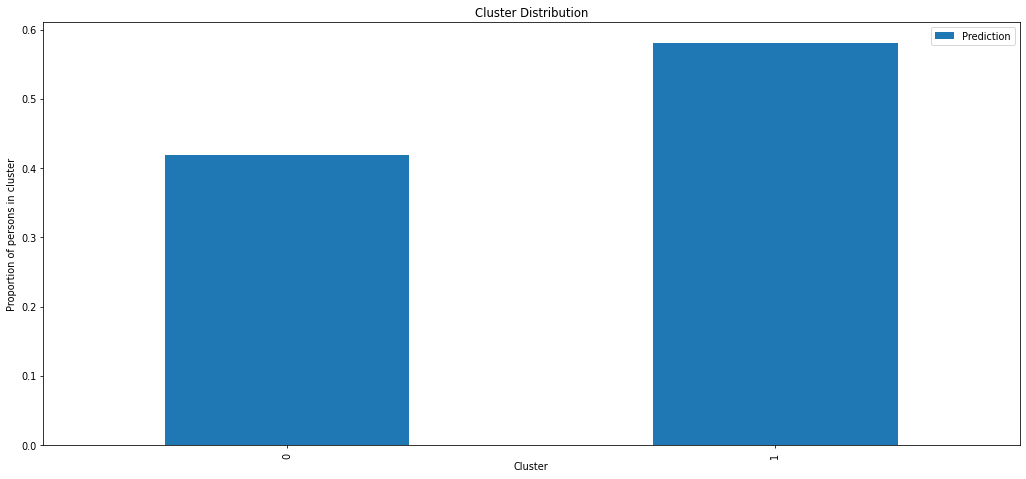

In [21]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(pca_14)

# Store the prediction
adult_predict = pd.DataFrame(np.array(model.predict(pca_14)), columns=['Prediction'])

# Count the cluster number
cluster_cnt = adult_predict['Prediction'].value_counts().sort_index()
display(cluster_cnt)

cluster_prop = pd.DataFrame((cluster_cnt/cluster_cnt.sum()), columns=['Prediction']).reset_index()
cluster_prop.set_index('index', inplace=True)
display(cluster_prop)


cluster_prop = cluster_prop.reset_index()
cluster_prop.plot(x = 'index', y = 'Prediction', kind = 'bar', figsize = (18,8 ))
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Proportion of persons in cluster')
plt.show()

In [22]:
# Investigate top components of cluster 0
cluster0_components = pd.Series(kmeans.cluster_centers_[0])
cluster0_components.sort_values(ascending=False, inplace=True)
cluster0_components.head(5)

0     1.445312
10    0.111371
8     0.093935
11    0.090152
7     0.051988
dtype: float64